![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

In [2]:
ser1 = pd.Series([3,5,7,3,2],index=["lundi","mardi", "mercredi", "jeudi", "vendredi"])

In [3]:
ser1

lundi       3
mardi       5
mercredi    7
jeudi       3
vendredi    2
dtype: int64

In [4]:
ser1["mercredi"]

7

In [5]:
ser1.dtype

dtype('int64')

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [6]:
ser_pop = pd.Series({"France":65, "USA":350, "Chine":1200, "Suisse":8})

In [7]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(ser_pop) == pd.Series
print("Bien créée !")

Bien créée !


In [8]:
ser_pop>50

France     True
USA        True
Chine      True
Suisse    False
dtype: bool

In [9]:
# on construit une série avec les populations de plus de 50
ser_pop_l50 = ser_pop[ser_pop>50]
ser_pop_l50

France      65
USA        350
Chine     1200
dtype: int64

In [10]:
# opérateur ou : |
# opérateur et : &
ser_pop[(ser_pop<50)|(ser_pop>300)]

USA        350
Chine     1200
Suisse       8
dtype: int64

In [11]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert ser_pop_l50.min() >= 50
print("Bravo !")

Bravo !


# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [12]:
ser_pop.name = "populations"
ser_pop.index.name = "pays"
ser_pop

pays
France      65
USA        350
Chine     1200
Suisse       8
Name: populations, dtype: int64

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [13]:
serie_manquant = pd.Series([2,np.nan,4],index=['a','b','c'])

In [14]:
serie_manquant.mean()

3.0

In [15]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [16]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

In [17]:
import datetime

In [18]:
datetime.date.today()

datetime.date(2021, 2, 1)

In [19]:
datetime.date.today()+datetime.timedelta(days=100)

datetime.date(2021, 5, 12)

In [20]:
pd.to_datetime("12/01/2021",dayfirst=True)

Timestamp('2021-01-12 00:00:00')

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

*Indice :* Utilisez les informations ci-dessus

On utilisera :
```
pd.date_range(___)
np.random.randn(___)
pd.Series(___)
```

In [21]:
import datetime
dates = pd.date_range(start="2017-10-3", end=datetime.date.today(), freq="D")
valeurs = np.random.randn(len(dates))

In [22]:
len(dates)

1218

<AxesSubplot:title={'center':'Mon graphique'}>

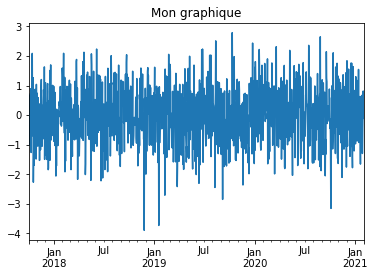

In [23]:
serie_temp = pd.Series(valeurs, index=dates)
serie_temp.plot(title="Mon graphique")


# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [24]:
frame1=pd.DataFrame(np.random.randn(10).reshape(5,2),
             index=["obs_"+str(i) for i in range(5)],
             columns=["col_"+str(i) for i in range(2)])
frame1

,col_0,col_1
obs_0,0.075884,0.147252
obs_1,0.253463,0.308486
obs_2,-0.126912,-2.051053
obs_3,0.119545,0.207320
obs_4,-1.916286,-1.858907


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [25]:
print(frame1.columns)

Index(['col_0', 'col_1'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [26]:
frame1.head(3)

,col_0,col_1
obs_0,0.075884,0.147252
obs_1,0.253463,0.308486
obs_2,-0.126912,-2.051053


Pour afficher un résumé du DF :

In [27]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, obs_0 to obs_4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   5 non-null      float64
 1   col_1   5 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [28]:
%pwd

'/home/s4d-1/Bureau/Python-Socio'

In [29]:
'C:\\Users\\s4d-asus-14\\Desktop\\Python-Socio\\data\\'
'./data'

'./data'

In [30]:
airbnb = pd.read_csv("./data/airbnb.csv")

/home/s4d-1/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert airbnb["price"].dtype == object
print("Bien importé !")

Bien importé !


Importer un fichier `.csv` qui a comme séparateur `;`, le nom du fichier est `base-dpt.csv`

In [32]:
base_dpt = pd.read_csv("./data/base-dpt.csv", sep=";")

In [33]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(base_dpt) == pd.DataFrame
print("Bien importé !")

Bien importé !


In [34]:
# afficher les 5 première lignes
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20190507030954,2019-05-07,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,...,f,f,flexible,f,f,1,1,0,0,0.28
1,5396,https://www.airbnb.com/rooms/5396,20190507030954,2019-05-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.44
2,7397,https://www.airbnb.com/rooms/7397,20190507030954,2019-05-07,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,2.47
3,8522,https://www.airbnb.com/rooms/8522,20190507030954,2019-05-08,GREAT FLAT w/ CITY VIEW,NaN,Really nice flat located in the 20th district ...,Really nice flat located in the 20th district ...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.01
4,9359,https://www.airbnb.com/rooms/9359,20190507030954,2019-05-07,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,"Since I live in the USA, it is difficult to ma...",Location! Location! Location! Just bring your ...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,NaN


In [35]:
airbnb.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59126 entries, 0 to 59125
Data columns (total 106 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    id                                            int64  
 1    listing_url                                   object 
 2    scrape_id                                     int64  
 3    last_scraped                                  object 
 4    name                                          object 
 5    summary                                       object 
 6    space                                         object 
 7    description                                   object 
 8    experiences_offered                           object 
 9    neighborhood_overview                         object 
 10   notes                                         object 
 11   transit                                       object 
 12   access                                      

# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/> 

In [36]:
web_bank = pd.read_html("https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/")

In [37]:
type(web_bank)

list

In [38]:
frame_bank = web_bank[0]

In [39]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(frame_bank) == pd.DataFrame
print("Bien importé !")

Bien importé !


In [40]:
frame_bank["City"].value_counts()

Chicago           20
Atlanta           10
Phoenix            6
Naples             5
Scottsdale         4
                  ..
Bloomington        1
Saint Marys        1
St. Stephen        1
Montgomery         1
Jefferson City     1
Name: City, Length: 433, dtype: int64

# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

1- avec `pd.read_excel()` pour le fichier `credit2.xlsx`

In [41]:
credit2 = pd.read_excel("./data/credit2.xlsx")

In [42]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert credit2["Age"].max() == 83
print("Bravo !")

Bravo !


2- avec `pd.ExcelFile()` pour le fichier `ville.xls`

In [43]:
ville_excel = pd.ExcelFile("./data/ville.xls")
# frame_ville = ____

In [44]:
ville_excel.sheet_names

['ville', 'ville-ain']

In [45]:
frame_ville = ville_excel.parse("ville")

In [46]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(frame_ville) == pd.DataFrame
print("Bravo !")

Bravo !


In [47]:
frame_ville.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35183 entries, 0 to 35182
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NomVille       35183 non-null  object 
 1   MAJ            35183 non-null  object 
 2    Code Postal   35183 non-null  int64  
 3    Code INSEE    35183 non-null  int64  
 4   Code Région    35183 non-null  int64  
 5    Latitude      35183 non-null  float64
 6    Longitude     35183 non-null  float64
 7    Eloignement   35097 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.1+ MB


In [48]:
frame_ville[" Eloignement "]

0           1
1           1
2        1.97
3        1.97
4        1.91
         ... 
35178       1
35179    1.36
35180    1.44
35181    2.84
35182    2.18
Name:  Eloignement , Length: 35183, dtype: object

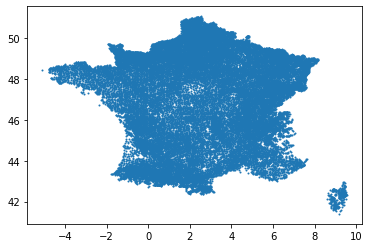

In [49]:
import matplotlib.pyplot as plt
plt.scatter(" Longitude "," Latitude ",s=1, data=frame_ville)

# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [50]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

*Indice :* On commence par créer la connexion et ensuite on fait la requête `select * from salaries`, la connexion se fait en utilisant l'adresse : "sqlite:///./data/salaries.sqlite"

In [51]:
connexion=create_engine("sqlite:///./data/salaries.sqlite")
salaries = pd.read_sql_query("select * from salaries", connexion)

In [52]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(salaries) == pd.DataFrame
print("Bravo !")

Bravo !


In [53]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,


In [54]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  object 
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


In [55]:
data_sas = pd.read_sas("./data/bce_uai.sas7bdat", encoding = 'latin-1')

In [56]:
data_sas["PATRONYME_UAI"].value_counts()

JULES FERRY                     499
JACQUES PREVERT                 370
JEAN MOULIN                     362
SAINT JOSEPH                    350
JEAN JAURES                     319
                               ... 
CLG LE DINANDIER                  1
JULES RAVAT                       1
PARC KALLISTE                     1
GROUPE SCOLAIRE JEAN NECTOUX      1
MONBAZILLAC                       1
Name: PATRONYME_UAI, Length: 27874, dtype: int64

# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

In [57]:
credit2.sort_values("Age",ascending=True)

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID
586,10,F,S,0,10,29,59,63015,T,10298
1135,10,F,S,0,12,29,58,67251,F,42213
1863,11,F,S,0,17,33,49,32093,T,78453
1561,11,F,S,0,7,27,64,37502,F,64453
136,11,F,S,0,7,33,58,65263,F,7629
...,...,...,...,...,...,...,...,...,...,...
135,82,F,U,53,10,49,39,59420,T,9193
671,82,M,M,57,6,29,64,68995,F,25216
1987,83,M,S,55,9,40,49,43184,F,88513
764,83,M,U,51,9,36,53,45617,F,48835


**Exercice :** 
    
Triez les données sur les salaires en se basant sur le TotalPay et le JobTitle

In [58]:
salaries_sorted = salaries.sort_values(["JobTitle","TotalPay"], ascending=[True, False])

In [59]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert salaries_sorted["JobTitle"].min() == salaries_sorted["JobTitle"].iloc[0]
print("Bravo !")

Bravo !


In [60]:
salaries_sorted.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
20765,20766,NAPOLEON VIRAY,ACCOUNT CLERK,60838.2,0,0,,60838.20,60838.20,2011,,San Francisco,
20867,20868,BERNADETTE RAMOS,ACCOUNT CLERK,49777.81,10753.06,0,,60530.87,60530.87,2011,,San Francisco,
21638,21639,SUSAN CHANG,ACCOUNT CLERK,51306.28,5406.34,1814.58,,58527.20,58527.20,2011,,San Francisco,
22972,22973,OLIVIA BOUDREAUX,ACCOUNT CLERK,49778.15,3811.68,1084.76,,54674.59,54674.59,2011,,San Francisco,
24132,24133,LI-XIN CAI,ACCOUNT CLERK,49777.8,1390.45,624,,51792.25,51792.25,2011,,San Francisco,


## Exportez des fichiers 

La plupart des outils d'importation existent en exportation, on utilise :
```
frame.to_csv("fichier.csv")
```


**Exercice :**
    
Exportez les données salaries dans un fichier Excel

In [61]:
salaries.to_excel("salaries.xlsx")

# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

In [62]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,


In [63]:
# on récupère une colonne entière
salaries["TotalPay"]

0         567595.43
1         538909.28
2         335279.91
3         332343.61
4         326373.19
            ...    
148649         0.00
148650         0.00
148651         0.00
148652         0.00
148653      -618.13
Name: TotalPay, Length: 148654, dtype: float64

In [64]:
# on récupère une valeur en utilisant les index et noms de colonnes
salaries.loc[3,"EmployeeName"]

'CHRISTOPHER CHONG'

In [65]:
# on récupère une valuer en utilisant les positions de la cellule
salaries.iloc[3,1]

'CHRISTOPHER CHONG'

**Exercice :**
    
Obtenir les moyennes et variances de la colonne `TotalPay` pour les données Salaries.


In [66]:
print(salaries["TotalPay"].mean())
print(salaries["TotalPay"].std())

74768.32197169267
50517.00527394987


In [67]:
def ma_stat(x):
    return x.min()*x.max()/x.mean()

In [68]:
salaries["TotalPay"].agg(["mean","std", "var",ma_stat])

mean       7.476832e+04
std        5.051701e+04
var        2.551968e+09
ma_stat   -4.692465e+03
Name: TotalPay, dtype: float64

In [69]:
salaries["TotalPay"].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [70]:
salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,74768.321972,93692.554811,2012.522643
std,42912.857795,50517.005274,62793.533483,1.117538
min,1.000000,-618.130000,-618.130000,2011.000000
25%,37164.250000,36168.995000,44065.650000,2012.000000
50%,74327.500000,71426.610000,92404.090000,2013.000000
75%,111490.750000,105839.135000,132876.450000,2014.000000
max,148654.000000,567595.430000,567595.430000,2014.000000


**Exercice ++ :**

Calculer la moyenne des prix des appartements airbnb

*Attention :* la colonne `price`a des problèmes

In [71]:
airbnb["price"].dtype

dtype('O')

In [72]:
airbnb["price"].str[1:]

0         75.00
1        115.00
2        115.00
3         90.00
4         75.00
          ...  
59121     50.00
59122    350.00
59123     80.00
59124     32.00
59125     60.00
Name: price, Length: 59126, dtype: object

In [73]:
pd.to_numeric(airbnb["price"].str.replace("$","").str.replace(",",""))

/home/s4d-1/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0         75.0
1        115.0
2        115.0
3         90.0
4         75.0
         ...  
59121     50.0
59122    350.0
59123     80.0
59124     32.0
59125     60.0
Name: price, Length: 59126, dtype: float64

Le type 'O' est apppelé objet et n'est donc pas nmérique (donc pas de moyenne !!)

On commence par trasformer en numérique !

Deux indices :
- on peut utiliser la fonction `pd.to_numeric(___)`
- une colonne de texte a de nombreuses méthode, si on veut remplacer dans une colonne de texte, on utiliser : `data["colonne"].str.replace(___,___)`

In [74]:
# on ajoute une colonne à la fin du dataframe :
airbnb["price_num"] = pd.to_numeric(airbnb["price"].str.replace("$","").str.replace(",",""))

print(airbnb["price_num"].mean())

116.32598180157629


/home/s4d-1/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [75]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert airbnb["price_num"].max() == 9379
print("Bravo !")

Bravo !


# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


In [76]:
airbnb["price_num"].fillna(airbnb["price_num"].median())
airbnb["room_type"].fillna("inconnu")

0        Entire home/apt
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
59121    Entire home/apt
59122    Entire home/apt
59123    Entire home/apt
59124       Private room
59125    Entire home/apt
Name: room_type, Length: 59126, dtype: object

# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2). On commence par importer `credit1.txt`


In [77]:
credit1 = pd.read_table("./data/credit1.txt")

In [78]:
credit_merged = pd.merge(credit1, credit2, on="Customer_ID", suffixes=("","_c2"))

In [79]:
credit_merged

,Months_as_a_Customer,Number_of_Products,RFM_Score,Average_Balance_Feed_Index,Number_of_Transactions,Personal_Debt_to_Equity_Ratio,Months_Current_Account,Number_of_Loan_Accounts,Customer_ID,Has_Bad_Payment_Record,...,Interested_in_Credit_Card,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner
0,24,3,10,229,2,40,13,0,5409,0,...,F,40,F,S,11,6,37,56,37073,F
1,12,2,12,8,1,47,5,2,5477,0,...,F,47,M,M,13,13,30,56,50721,F
2,36,0,0,0,0,35,31,0,5507,0,...,F,35,F,U,1,9,33,57,43578,T
3,0,0,0,0,0,45,-3,0,8,0,...,F,45,M,U,15,7,30,62,69553,F
4,48,0,0,0,0,13,39,0,158,0,...,F,13,F,S,0,7,27,64,37502,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,48,0,0,0,0,38,35,1,76387,0,...,F,38,M,S,8,6,56,37,36646,F
1996,24,2,8,70,1,11,20,0,76430,0,...,F,11,F,S,0,7,33,58,65263,F
1997,36,5,8,109,2,23,27,1,76485,0,...,F,23,M,S,0,14,32,53,63861,T
1998,12,41,21,474,13,28,5,0,76678,0,...,F,28,F,S,0,7,33,58,65263,T


In [80]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert credit_merged.shape[1] == 31
print("Bravo !")

Bravo !


# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir 5 niveaux de prix.

In [81]:
airbnb["price_disc"] = pd.cut(airbnb["price_num"],5)
airbnb["price_disc"].value_counts().sort_index()

(-9.379, 1875.8]    59078
(1875.8, 3751.6]       36
(3751.6, 5627.4]        6
(5627.4, 7503.2]        0
(7503.2, 9379.0]        6
Name: price_disc, dtype: int64

In [82]:
airbnb["price_disc2"] = pd.qcut(airbnb["price_num"],5)
airbnb["price_disc2"].value_counts().sort_index()

(-0.001, 53.0]     11933
(53.0, 70.0]       12226
(70.0, 94.0]       11408
(94.0, 140.0]      12338
(140.0, 9379.0]    11221
Name: price_disc2, dtype: int64

In [83]:
assert airbnb["price_disc"].dtype == "category"
print("Bravo !")

Bravo !


In [84]:
airbnb.iloc[airbnb["price_num"].idxmax()]

id                                                                          7225849
listing_url                                    https://www.airbnb.com/rooms/7225849
scrape_id                                                            20190507030954
last_scraped                                                             2019-05-07
name                                                 Artistic apartment, Montmartre
                                                               ...                 
calculated_host_listings_count_shared_rooms                                       0
reviews_per_month                                                              0.51
price_num                                                                    9379.0
price_disc                                                         (7503.2, 9379.0]
price_disc2                                                         (140.0, 9379.0]
Name: 12976, Length: 109, dtype: object

In [85]:
salaries.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

In [86]:
# choix du nombre de lignes à afficher
# pd.set_option("max_rows", 5000)

In [87]:
pivot_salaries = salaries.pivot_table(values="TotalPay",
                     index="JobTitle",
                     columns="Year",
                     aggfunc=["mean","max"])

In [88]:
pivot_salaries

mean                \
Year                                                    2011          2012   
JobTitle                                                                     
ACCOUNT CLERK                                   44035.664337           NaN   
ACCOUNTANT                                      47429.268000           NaN   
ACCOUNTANT INTERN                               29031.742917           NaN   
ACPO,JuvP, Juv Prob (SFERS)                              NaN           NaN   
ACUPUNCTURIST                                   67594.400000           NaN   
...                                                      ...           ...   
X-RAY LABORATORY AIDE                           52705.880385           NaN   
X-Ray Laboratory Aide                                    NaN  53492.062258   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  53632.870000           NaN   
Youth Comm Advisor                                       NaN  57544.730000   
ZOO CURATOR                                     66686.560000           NaN   

                                                                            \
Year                                                    2013          2014   
JobTitle                                                                     
ACCOUNT CLERK                                            NaN           NaN   
ACCOUNTANT                                               NaN           NaN   
ACCOUNTANT INTERN                                        NaN           NaN   
ACPO,JuvP, Juv Prob (SFERS)                              NaN  62290.780000   
ACUPUNCTURIST                                            NaN           NaN   
...                                                      ...           ...   
X-RAY LABORATORY AIDE                                    NaN           NaN   
X-Ray Laboratory Aide                           47992.220588  51211.566857   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS           NaN           NaN   
Youth Comm Advisor                              35823.295000  36465.910000   
ZOO CURATOR                                              NaN           NaN   

                                                     max                      \
Year                                                2011      2012      2013   
JobTitle                                                                       
ACCOUNT CLERK                                   60838.20       NaN       NaN   
ACCOUNTANT                                      65392.01       NaN       NaN   
ACCOUNTANT INTERN                               58799.53       NaN       NaN   
ACPO,JuvP, Juv Prob (SFERS)                          NaN       NaN       NaN   
ACUPUNCTURIST                                   67594.40       NaN       NaN   
...                                                  ...       ...       ...   
X-RAY LABORATORY AIDE                           85077.40       NaN       NaN   
X-Ray Laboratory Aide                                NaN  88546.07  83147.77   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  53632.87       NaN       NaN   
Youth Comm Advisor                                   NaN  57544.73  52433.88   
ZOO CURATOR                                     66686.56       NaN       NaN   

                                                          
Year                                                2014  
JobTitle                                                  
ACCOUNT CLERK                                        NaN  
ACCOUNTANT                                           NaN  
ACCOUNTANT INTERN                                    NaN  
ACPO,JuvP, Juv Prob (SFERS)                     62290.78  
ACUPUNCTURIST                                        NaN  
...                                                  ...  
X-RAY LABORATORY AIDE                                NaN  
X-Ray Laboratory Aide                           99812.97  
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS       NaN  
Youth Comm Advisor                       

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB. On veut afficher les moyenne des prix en fonction de deux colonnes du DataFrame

In [89]:
"count"

'count'

In [90]:
airbnb = pd.read_csv("./data/airbnb.csv", dtype={"zipcode":str})
airbnb["price_num"] = pd.to_numeric(airbnb["price"].str.replace("$","").str.replace(",",""))

/home/s4d-1/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/s4d-1/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [91]:
pivot_airbnb = airbnb.pivot_table(values= "price_num",
                  index = "zipcode",
                  columns = "room_type",
                  aggfunc = "mean")

In [92]:
pivot_airbnb.idxmax()

room_type
Entire home/apt    Paris 75004
Private room             75008
Shared room              75017
dtype: object

On veut trier le tableau en fonction du nombre d'appartement par code postal

Indice : on utilise `"count"` et `.sort_values()`

In [93]:
def etendue(x):
    return x.max()-x.min()

In [94]:
pivot_airbnb2 = airbnb.pivot_table(values= "price_num",
                  index = "zipcode",
                  columns = "room_type",
                  aggfunc = ["mean","count",etendue])

In [95]:
pivot_airbnb2.sort_values( ("count","Entire home/apt"), 
                          ascending=False )

mean                                    count  \
room_type    Entire home/apt Private room Shared room Entire home/apt   
zipcode                                                                 
75018              86.545686    67.264205   37.833333          5899.0   
75011              94.317690    62.240887   37.711538          4986.0   
75015             109.508263   103.635563   50.300000          3691.0   
75010             102.970580    88.837838   58.441860          3603.0   
75017             102.015504   137.713987  301.636364          3354.0   
...                      ...          ...         ...             ...   
44190                    NaN   110.000000         NaN             NaN   
54013                    NaN    59.000000         NaN             NaN   
700014                   NaN   160.000000         NaN             NaN   
75003\n75003             NaN   120.000000         NaN             NaN   
7518                     NaN    82.333333         NaN             NaN   

                                              etendue                           
room_type    Private room Shared room Entire home/apt Private room Shared room  
zipcode                                                                         
75018               704.0        36.0          9379.0       1992.0        71.0  
75011               631.0        52.0          1200.0        351.0       115.0  
75015               568.0        40.0          8576.0       1077.0       135.0  
75010               518.0        43.0          1870.0       1191.0       979.0  
75017               479.0        22.0          1990.0        985.0      4991.0  
...                   ...         ...             ...          ...         ...  
44190                 1.0         NaN             NaN          0.0         NaN  
54013                 1.0         NaN             NaN          0.0         NaN  
700014                1.0         NaN             NaN          0.0         NaN  
75003\n75003          1.0         NaN             NaN          0.0         NaN  
7518                  3.0         NaN             NaN         30.0         NaN  

[78 rows x 9 columns]

# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


In [96]:
airbnb["price_num"].describe()

count    59126.000000
mean       116.325982
std        167.669754
min          0.000000
25%         59.000000
50%         80.000000
75%        120.000000
max       9379.000000
Name: price_num, dtype: float64

In [97]:
airbnb_group_room = airbnb.groupby(["zipcode","room_type"])

In [98]:
airbnb_group_room["price_num"].describe()

,,count,mean,std,min,25%,50%,75%,max
zipcode,room_type,,,,,,,,
075016,Entire home/apt,1.0,80.0,NaN,80.0,80.0,80.0,80.0,80.0
17410,Entire home/apt,1.0,215.0,NaN,215.0,215.0,215.0,215.0,215.0
24160,Entire home/apt,1.0,413.0,NaN,413.0,413.0,413.0,413.0,413.0
33780,Entire home/apt,2.0,191.0,16.970563,179.0,185.0,191.0,197.0,203.0
44190,Private room,1.0,110.0,NaN,110.0,110.0,110.0,110.0,110.0
...,...,...,...,...,...,...,...,...,...
95170,Shared room,2.0,14.0,0.000000,14.0,14.0,14.0,14.0,14.0
FR,Entire home/apt,4.0,107.0,38.323187,69.0,76.5,109.5,140.0,140.0
FR75016,Entire home/apt,1.0,150.0,NaN,150.0,150.0,150.0,150.0,150.0


**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [99]:
salaries["JobTitle"] = salaries["JobTitle"].str.lower()

In [100]:
salaries_job_group = salaries.groupby("JobTitle")
salaries_job_group["TotalPay"].agg(["count","mean","max","min"]).sort_values("count", ascending = False).to_excel("job_SF.xlsx")

In [101]:
#airbnb_group_room.agg("min")
airbnb_group_room.agg({"review_scores_rating":"mean","price_num":"max"})


,,review_scores_rating,price_num
zipcode,room_type,,
075016,Entire home/apt,93.0,80.0
17410,Entire home/apt,NaN,215.0
24160,Entire home/apt,NaN,413.0
33780,Entire home/apt,NaN,203.0
44190,Private room,NaN,110.0
...,...,...,...
95170,Shared room,94.5,14.0
FR,Entire home/apt,92.5,140.0
FR75016,Entire home/apt,NaN,150.0
